The following is a categorized list of search strategies commonly used in artificial intelligence. These are divided into uninformed (blind) and informed (heuristic) search methods based on whether or not they utilize domain-specific knowledge during the search process. ([click for more info](http://i-rep.emu.edu.tr:8080/jspui/bitstream/11129/4714/1/algasikhaled.pdf))

## Uninformed Search Techniques
- Breadth-First Search
- Depth-First Search
- Depth-Limited Search
- Iterative Deepening Search
- Uniform Cost Search
- Bidirectional Search

## Informed Search Techniques
- Best-First Search
- Greedy Best-First Search
- A* Search Strategy
- Hill Climbing Search
- Dijkstra’s Algorithm

# notes from the lecture

## Search Problems
* initial state
* actions
* transition model
* goal test
* path cost function
  
=> optimal solution

### node
a data structure that keeps
* a state
* a parent (node that generated this node)
* an action (action applied to parent to get node)
* a path cost (from initial state to node)

## approach
* start with a frontier that contains the initial state
* constantly remove a node from the frontier
* look at where we can get to next
* add those nodes to the frontier
* repeat:
  * if the frontier is empty, there is no solution
  * remove a node from the frontier
  * if node contains goal state, return the solution
  * add the node to the explored set
  * expand node, add resulting nodes to the frontier if they are not already in the frontier or the explored set

## uninformed search
search strategy that uses no problem-specific knowledge

### depth-first search
search algorithm that always expands the deepest node in the frontier

#### stack => frontier
last-in first-out data type

### breadth-first search
search algorithm that always expands the shallowest node in the frontier

#### queue => frontier
first-in first-out data type


In [81]:
!type maze_dfs.py
# !cat maze_dfs.py

import sys

class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action


class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node


class QueueFrontier(StackFrontier):

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

class Maze():

    def __init__(self, filename):

        # Read file a

In [82]:
!python maze_dfs.py maze2.txt

Maze:

###                 #########
#   ###################   # #
# ####                # # # #
# ################### # # # #
#                     # # # #
##################### # # # #
#   ##                # # # #
# # ## ### ## ######### # # #
# #    #   ##B#         # # #
# # ## ################ # # #
### ##             #### # # #
### ############## ## # # # #
###             ##    # # # #
###### ######## ####### # # #
###### ####             #   #
A      ######################

Solving...
States Explored: 194
Solution:

###                 #########
#   ###################   # #
# ####                # # # #
# ################### # # # #
#                     # # # #
##################### # # # #
#   ##********        # # # #
# # ##*### ##*######### # # #
# #****#   ##B#         # # #
# #*## ################ # # #
###*##             #### # # #
###*############## ## # # # #
###****         ##    # # # #
######*######## ####### # # #
######*####             #   #
A******############

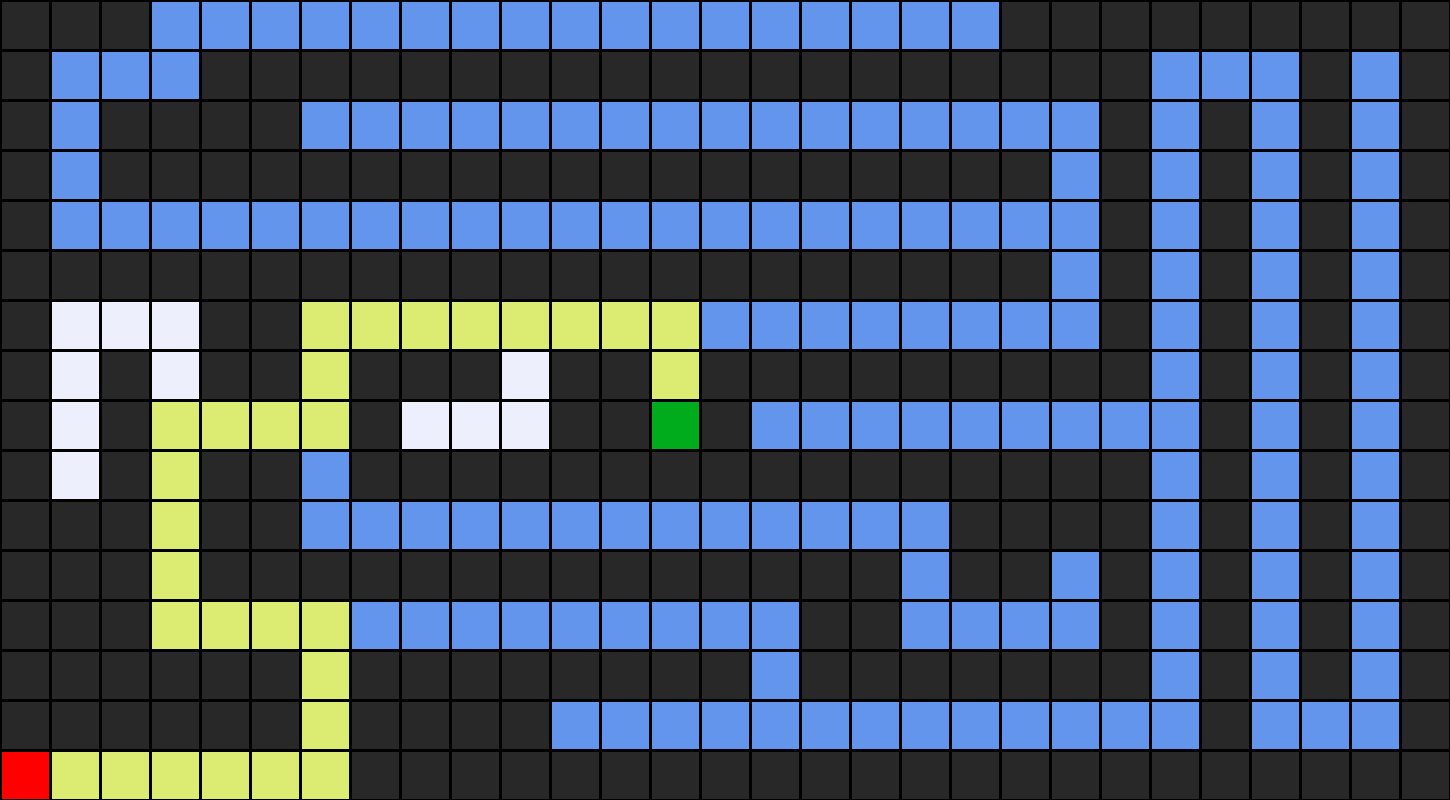

In [83]:
from IPython.display import Image
Image(filename='maze_dfs.png') 

In [84]:
!python maze_bfs.py maze2.txt

Maze:

###                 #########
#   ###################   # #
# ####                # # # #
# ################### # # # #
#                     # # # #
##################### # # # #
#   ##                # # # #
# # ## ### ## ######### # # #
# #    #   ##B#         # # #
# # ## ################ # # #
### ##             #### # # #
### ############## ## # # # #
###             ##    # # # #
###### ######## ####### # # #
###### ####             #   #
A      ######################

Solving...
States Explored: 77
Solution:

###                 #########
#   ###################   # #
# ####                # # # #
# ################### # # # #
#                     # # # #
##################### # # # #
#   ##********        # # # #
# # ##*### ##*######### # # #
# #****#   ##B#         # # #
# #*## ################ # # #
###*##             #### # # #
###*############## ## # # # #
###****         ##    # # # #
######*######## ####### # # #
######*####             #   #
A******#############

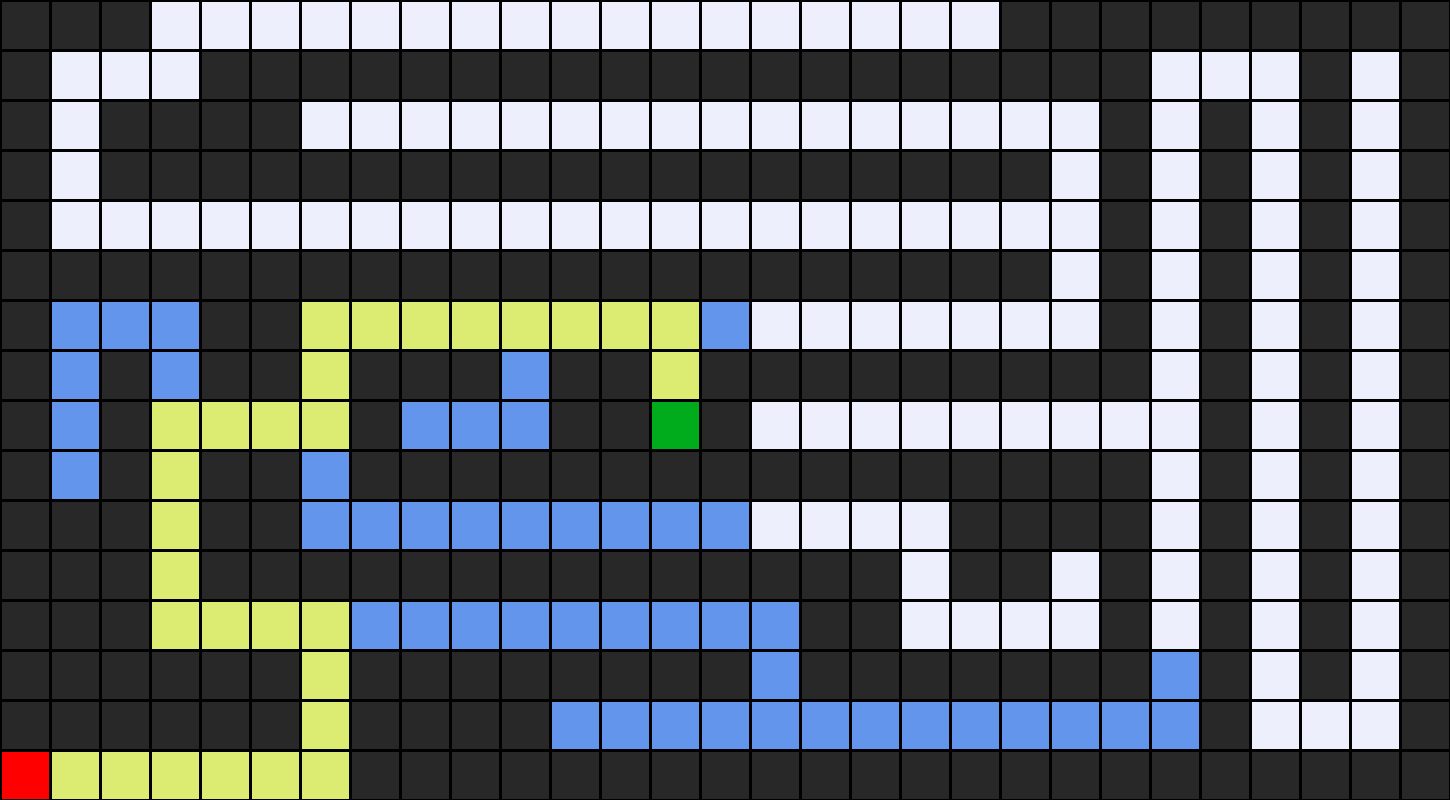

In [85]:
from IPython.display import Image
Image(filename='maze_bfs.png') 

In [86]:
!python maze_dfs.py maze3.txt

Maze:

##    #
## ## #
#B #  #
# ## ##
     ##
A######

Solving...
States Explored: 17
Solution:

##****#
##*##*#
#B*#**#
# ##*##
*****##
A######



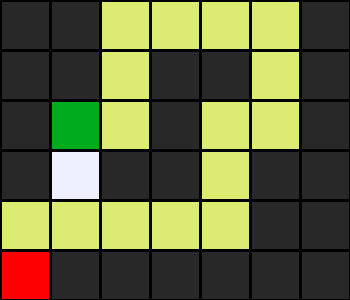

In [87]:
from IPython.display import Image
Image(filename='maze_dfs.png') 

In [88]:
!python maze_bfs.py maze3.txt

Maze:

##    #
## ## #
#B #  #
# ## ##
     ##
A######

Solving...
States Explored: 6
Solution:

##    #
## ## #
#B #  #
#*## ##
**   ##
A######



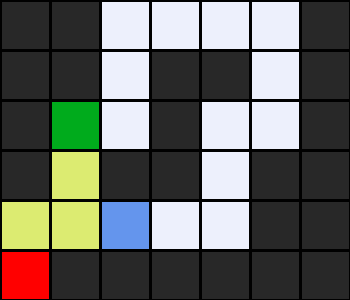

In [89]:
from IPython.display import Image
Image(filename='maze_bfs.png') 

## informed search
search strategy that uses problem-specific knowledge to find solutions more efficiently

### greedy best-first search
search algorithm that expands the node that is closest to the goal, as estimated by a heuristic function *h(n)*

* make a choice based on how far I estimate I am from the goal

##### Manhattan distance, taxicab distance, or city block distance
a metric used to determine the distance between two points in a grid-like path

### A* (A star) search
search algorithm that expands node with lowest value of *g(n)* + *h(n)*

*g(n)* = cost to reach node

*h(n)* = estimated cost to goal

* make a choice based on the sum of how many steps it took me to get to my current position and then how far I estimate I am from the goal

* optimal if
    * *h(n)* is admissible (never overestimates the true cost), and
    * *h(n)* is consistent (for every node *n* and successor (the node after n) *n'* with step cost *c, h(n) <= h(n') +c* )

* the challenge is choosing the heuristic. The better the heuristic is, the better I'll be able to solve the problem, and the fewer states that I'll have to explore.

* have a tendency to use quite a bit of memory

## adversarial search
there is more than one agent

### minimax
- assign numbers to each of the possible outcomes (1, 0, -1)
- assign numbers to the players (max and min)
* MAX(X) aims to maximize the score
* MIN(O) aims to minimize the score
- S0: initial state
- PLAYER(s): returns which player to move in state s
- ACTIONS(s): returns legal moves in state s
- RESULT(s, a): returns state after action a taken in state s # transition model
- TERMINAL(s): checks if state s is a terminal state
- UTILITY(s): final numerical value for terminal state s



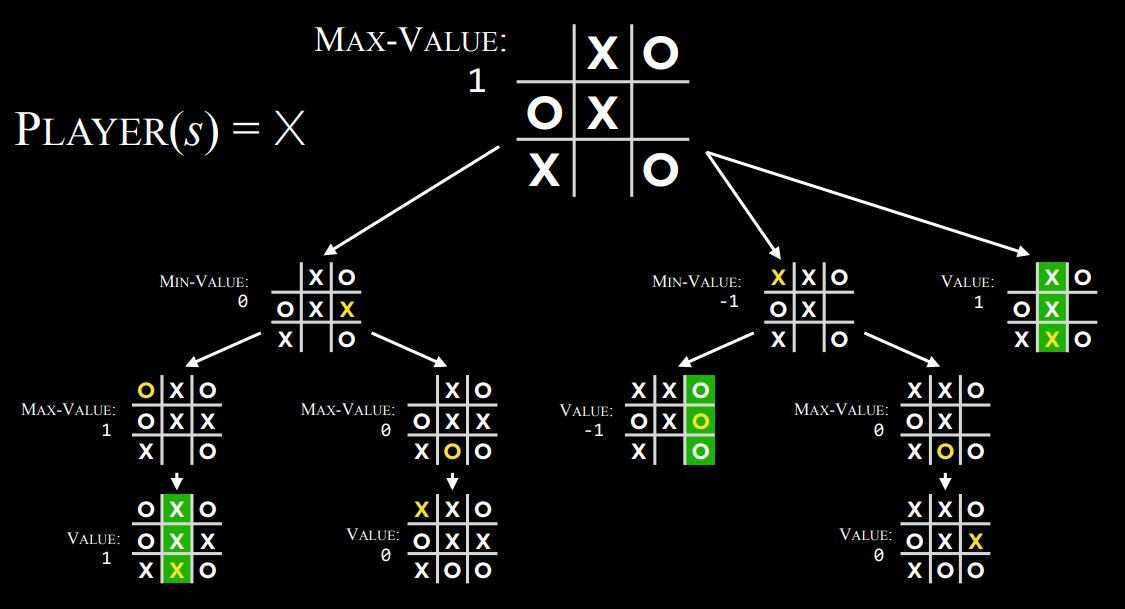

In [113]:
from IPython.display import Image
Image(filename='minmax.jpg') 

* given a state *s*:
  * MAX picks action *a* in ACTIONS(s) that produces highest value of MIN-VALUE(RESULT(s, a))
  * MIN picks action *a* in ACTIONS(s) that produces smallest value of MAX-VALUE(RESULT(s, a))

function MAX-VALUE(state):

    if TERMINAL(state):
    
        return UTILITY(state)
        
    v = -inf
    
    for action in ACTIONS(state):
    
        v = MAX(v, MIN-VALUE(RESULT(state, action))
        
    return v
    
function MIN-VALUE(state):

    if TERMINAL(state): 
    
        return UTILITY(state)    
        
    v = +inf 
    
    for action in ACTIONS(state): 
    
        v = MIN(v, MAX-VALUE(RESULT(state, action)) 
        
    return v 
    


## alpha-beta pruning
Alpha and beta stand for these two values that you'll have to keep track of, the best you can do so far and the worst you can do so far.

And pruning is the idea of, if I have a big, long, deep search tree, I might be able to search it more efficiently if I don't need to search through everything, if I can remove some of the nodes to try and optimize the way that I look through this entire search space.

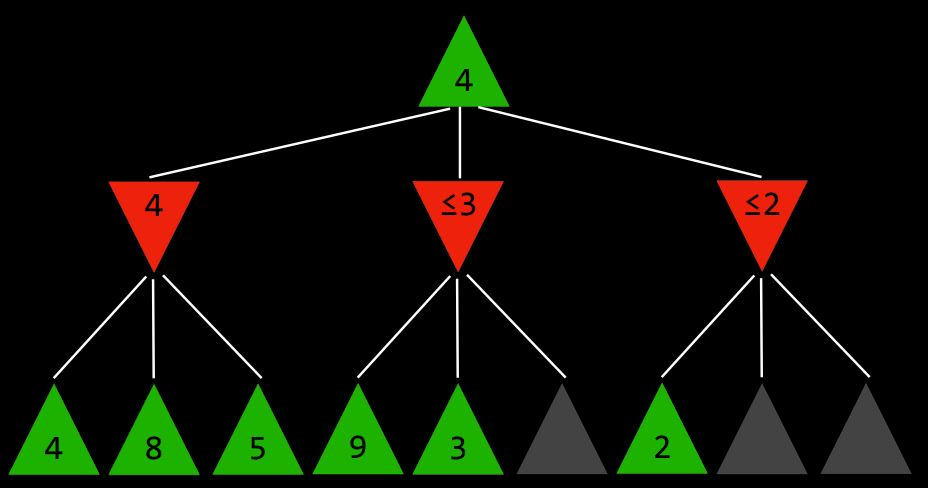

In [116]:
from IPython.display import Image
Image(filename='bookkeeping.jpg') 

255,168 Tic-Tac-Toe possible games

for after 4 moves from each player, it is 288,000,000,000 possible chess games
entire chess game 10^29000

## depth-limited minimax
But what do we do after we get 10 or 12 moves deep, and we arrive at a situation where the game's not over?
Minimax still needs a way to assign a score to that game board or game state to figure out what its current value is, which is easy to do if the game is over, but not so easy to do if the game is not yet over.

### evaluation function
function that estimates the expected utility of the game from a given state

depending on how good that evaluation function is, that is ultimately what's going to constrain how good the AI is.
The better the AI is at estimating how good or how bad any particular game state is, the better the AI is going to be able to play that game.

In chess, for example, you might write an evaluation function based on how many pieces you have, as compared to how many pieces your opponent has, because each one has a value in your evaluation function.